# Part I - Exploring Loan Data from Prosper
## by Opetunde Adepoju

## Introduction
Prosper is a P2P lending platform that allows investors to choose among personal loans to invest in. They do that by considering a number of factors, which include a custom calculated Prosper Score that represents the risk for each loan. The higher the score, the lower the risk, and the lower the interest rates paid by the borrower to the investors.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [48]:
# load in the dataset into a pandas dataframe, print statistics
the_loan = pd.read_csv('prosperLoanData.csv')
loan = the_loan.copy()

In [4]:
#print the structure of the loan dataset
print(loan.shape)
loan.head(5)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [49]:
# select and drop the listings that have 'ProsperRating'
# and the listings of borrowers with no prior PROSPER loans

loan['ListingCreationDate'] = pd.to_datetime(loan['ListingCreationDate'])

l1 = loan[loan['ListingCreationDate'] < '2009-07-01'].index.tolist()
l2 = loan[loan['ScorexChangeAtTimeOfListing'].notna()].index.tolist()
l3 = loan[loan['TotalProsperLoans'].notna()].index.tolist()

loan.drop(labels=l1+l2+l3, inplace=True)
loan = loan.reset_index(drop=True)

In [6]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_sub = loan[cols]

In [50]:
# create a new column to merge the two 'CreditScoreRange'
loan['CreditScore'] = loan[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)
loan['CreditScore'] = loan['CreditScore'].astype(int)

### What is the structure of your dataset?
The dataset has 113,937 loans with 81 columns (or variables). 

The dataset features can be split into two main categories:

1. Borrower information
2. Loan performance information 

### What is/are the main feature(s) of interest in your dataset?

As an investor, I'm most interested in finding out which borrower features are best for predicting the highest rate of return.

How closely did the estimated loan performance match the actual loan performance? What features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Though there are many features to explore, I suspect the following borrower features will have the largest effect on the performance of the loan:

<b>IncomeRange</b> - The income range of the borrower at the time the listing was created.

<b>DebToIncomeRatio</b> - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

<b>CreditGrade</b> - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

<b>ProsperRating (Alpha)</b> - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
The performance of the loan can be determined by the following features:

- <b>EstimatedReturn</b> - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009. This is on an annual percentage rate (APR). </br>
- <b>ActualReturn</b> - To see how well our note performed vs the Estimated Returns, we will derive this feature based on how Prosper calculates their Annualized Net Returns

## Univariate Exploration

I will begin by exploring the data against the dependent variable `Estimated Return`


In [7]:
# Convert EmploymentStatus and IncomeRange to ordered categorical data type
var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
            'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0'],
            'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
           }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [8]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
# drop null rows without an estimated return
loan.EstimatedReturn.dropna(axis = 0, inplace = True)

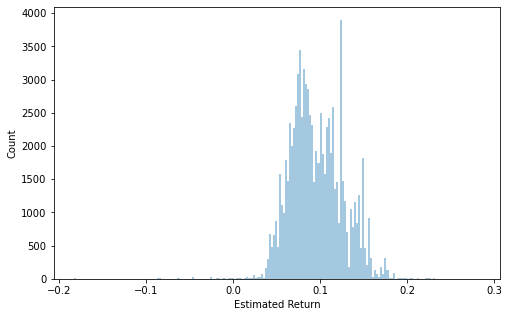

In [10]:
# histogram plot
plt.figure(figsize = [8,5])
sb.distplot(loan.EstimatedReturn, kde = False, bins = 200)
plt.xlabel('Estimated Return')
plt.ylabel('Count');

Analysis from the histogram above shows that most of our loans have an estimated return between 0% and 20%, let's zoom in on this distribution.

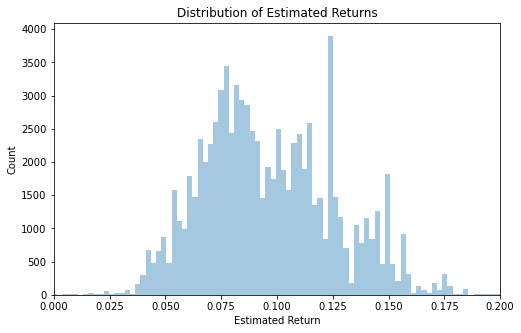

In [11]:
# zoom in on histogram
plt.figure(figsize = [8,5])
sb.distplot(loan.EstimatedReturn, kde = False, bins = 200)
plt.xlim(0, .2)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title('Distribution of Estimated Returns');

The distribution is right skewed, so it seems that our quartile analysis is accurate.</br>

Additionally, it appears that some of the conventional figures, such as 5%, 7.5 %, 12.5 %, and 15%, have peaks. The largest bin falls right around 12.5%, which is most curious.

Let's attempt to determine the actual returns and compare them to the estimated returns.

## Finding Actual Returns 

This section appears to be quite nuanced and required a bit of feature engineering. Let's try to calculate the actual returns by using the remaining loan performance (LP) variables.

From Prosper's FAQs, we see this: 

>We calculated Historical Return for loans originated through Prsoper as follows: ...(a) the sum of the Interest Paid, plus Late Fees, minus Servicing Fees, minus Collection Fees, in each case on active loans, plus Net Recoveries on charged-off or defaulted loans, plus Net Debt Sale Proceeds on sold loans, minus Gross Principal Losses; divided by (b) the sum of the Principal Balances Outstanding on active loans at the end of each day since origination. We then annualize the result to get the “Historical Return” for the Group.

To simplify our calculation for exploratory purposes, we will only divide by the original loan amount. We will run into other categorical issues if we try to determine the current rate of return for current loans vs completed loans etc. We may revisit this section to refine our actual returns feature.



In [12]:
# simplified actual return formula
loan['ActualReturns'] = loan.LP_CustomerPayments - loan.LoanOriginalAmount - (loan.LP_ServiceFees + loan.LP_CollectionFees + loan.LP_NetPrincipalLoss)
loan['ActualReturns'] = 1 + (loan.ActualReturns / loan.LoanOriginalAmount)

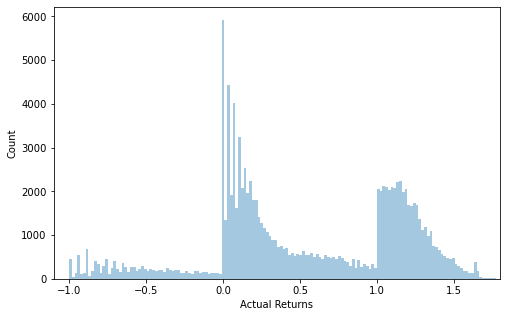

In [14]:
# plot distribution
plt.figure(figsize = [8,5])
sb.distplot(loan.ActualReturns, kde = False, bins = 200)
plt.xlim(-1.1, 1.8)
plt.xlabel('Actual Returns')
plt.ylabel('Count');

There are some loans where it appears that the borrower never made a payment which gives us the minimum of losing 100% of the investment. On the other end of the spectrum, it looks like most loans drop off after about 170% of the original loan amount.

There appears to be different modes to the distribution. I will check to see how the actual returns are different from the loan status:

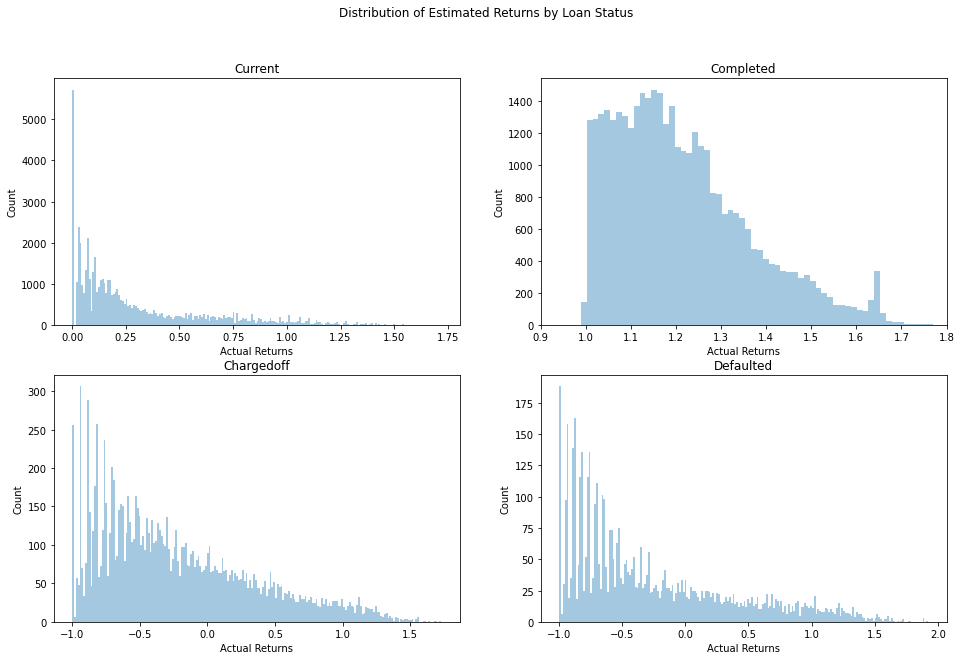

In [15]:
# multiplot for loan status

variables = ['Current', 'Completed', 'Chargedoff', 'Defaulted']

plt.figure(figsize = [16, 10])

# loop through variables list
for i in range(len(variables)):
    plt.subplot(2, 2, i+1)
    
    sb.distplot(loan.query('LoanStatus == "{}"'.format(variables[i])).ActualReturns, 
                 kde = False, bins = 200)
    
    plt.xlabel('Actual Returns')
    plt.ylabel('Count')
    plt.title(variables[i])
    
plt.subplot(2, 2, 2)
plt.xlim(.9, 1.8)

plt.suptitle('Distribution of Estimated Returns by Loan Status');

For the current loans, there appears to be a large number of loans that have an actual return value of 0. This could mean that "Current" also takes into account all the loans that have not been fully funded yet. 

Since our actual returns feature is not on an annual record, we see that for the loan terms of 3-5 years, an investor could see a total return of 170%.

The implication of this is that if a borrower has a loan for `$10,000` over the term of 5 years at a 25\% interest rate, they would have paid a total of `$17,610.79` back in principal and interest. Dividing these two numbers give us an actual return of approximately 176% in return. This gives us confidence that our actual returns feature is not completely out of range.

For loans that have defaulted or have been chargedoff, it makes sense that a majority of them show negative returns up to 100%. Meaning that the borrower could have never made a payment or the service/collection fees resulted in the investor losing their entire principal. Of course this is the worst case scenario. It's reassuring to see that this occurs in a minority of the loans, however it is nonzero and has a significant impact on an investors portfolio if they are diversified over several notes.

## Grading Prosper Rating and Credit
Now that we have a high level overview of what the returns on the platform look like, let's see if there is a similar or distribution for the borrower's prosper rating/credit grade.

In [16]:
loan['ProsperRating (Alpha)'].describe(), loan['ProsperRating (Alpha)'].value_counts()

(count     84853
 unique        7
 top           C
 freq      18345
 Name: ProsperRating (Alpha), dtype: object,
 C     18345
 B     15581
 A     14551
 D     14274
 E      9795
 HR     6935
 AA     5372
 Name: ProsperRating (Alpha), dtype: int64)

In [17]:
loan['CreditGrade'].describe(), loan['CreditGrade'].value_counts()

(count     28953
 unique        8
 top           C
 freq       5649
 Name: CreditGrade, dtype: object,
 C     5649
 D     5153
 B     4389
 AA    3509
 HR    3508
 A     3315
 E     3289
 NC     141
 Name: CreditGrade, dtype: int64)

From the feature descriptions, it looks like Prosper transitioned to a "Prosper Rating" after 2009 to differentiate themselves from the industry standard "Credit Grade.

For exploratory purposes, we'll replace the Credit Grade of No Credit (NC) with High Risk (HR) and combine this column with the Prosper Rating.

In the future we may want to look at estimated returns of the pre-2009 "Credit Grade" to see how it compares with the post-2009 "Prosper Rating" to validate if they truly are equivalent or if Prosper skewed their credit rating in some way.

In [18]:
# replace NC with HR
loan['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
loan['ProsperRating (Alpha)'].fillna("", inplace = True)
loan['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
loan['ProsperRatingCombined'] = loan['ProsperRating (Alpha)'] + loan['CreditGrade']

# drop rows with no credit ratings
loan = loan.query(' ProsperRatingCombined != ""')

# check values
loan['ProsperRatingCombined'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     16733
AA     8881
HR     6935
Name: ProsperRatingCombined, dtype: int64

In [19]:
# Check if the number of A and AA ratings the same before and after combining the columns?
(loan['ProsperRatingCombined'] == 'A').sum() == (loan.CreditGrade == 'A').sum() + (loan['ProsperRating (Alpha)'] == 'A').sum() and \
(loan['ProsperRatingCombined'] == 'AA').sum() == (loan.CreditGrade == 'AA').sum() + (loan['ProsperRating (Alpha)'] == 'AA').sum()

True

In [20]:
#Visualize the columns
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
loan['ProsperRatingCombined'] = loan['ProsperRatingCombined'].astype(ordered_var)

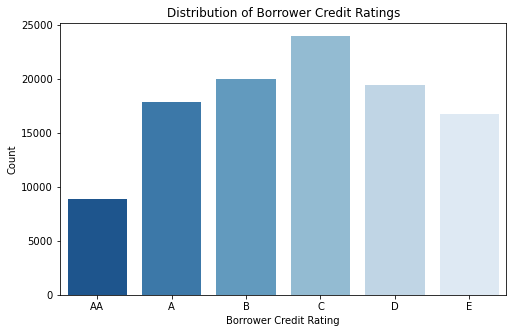

In [22]:
plt.figure(figsize = [8, 5])
sb.countplot(data = loan, x = 'ProsperRatingCombined', palette = "Blues_r")
plt.xlabel('Borrower Credit Rating')
plt.ylabel('Count')
plt.title('Distribution of Borrower Credit Ratings');

The distribution of credit ratings is skewed to the right which coincides with our observation of estimated return distribution also being skewed to the right

This could mean that for a particular credit rating we have a range of possible estimated returns. We will look into this in our bivariate visualizations.

## Income Range Analysis
There are a couple of features that are required for borrowers to be assigned these Credit Ratings. We'll start with taking a look at Income Ranges.

In [23]:
loan.IncomeRange.value_counts()

$25,000-49,999    32152
$50,000-74,999    31005
$100,000+         17321
$75,000-99,999    16899
Not displayed      7741
$1-24,999          7261
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [25]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
loan['IncomeRange'] = loan['IncomeRange'].astype(ordered_var)

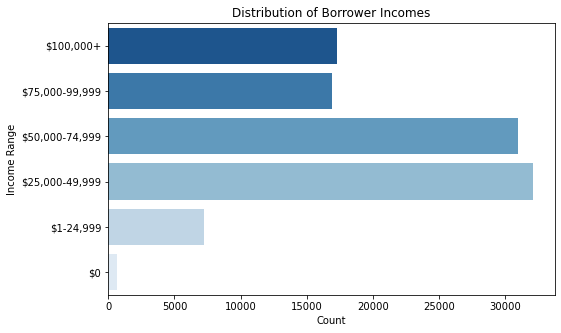

In [26]:
# bar chart
plt.figure(figsize = [8, 5])
sb.countplot(data = loan, y = 'IncomeRange', palette = "Blues_r")
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Distribution of Borrower Incomes');

We can deduce from here that the number of borrowers for the `$25k-49k` range is the same as the `$50k - 74k` range. The amount of borrowers in the `$74k` range. The amount of borrowers in the \$75k-100k range is the same as all the borrowers that have an income of over 100k.

## Debt to income Ratio
Of course your income is only part of the picture, let's see what the borrower's Debt to Income Ratio is like. I imagine a creditor wants to make sure you're not overleveraged in the event you have a loss of income and are unable to repay all of your debts.

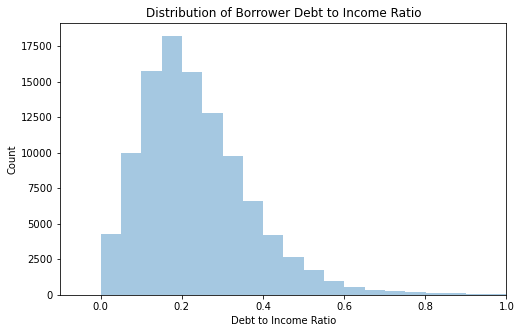

In [27]:
# distribution plot
plt.figure(figsize = [8,5])
sb.distplot(loan.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

To summarize our variables of interest, we looked at income, debt to income ratios, credit ratings, estimated returns and actual returns for the data set.

We saw relatively normal distributions for income, debt to income, credit ratings, and estimated returns. However, trying to calculate the real time actual returns proved to be difficult. We may want to revisit this feature if we are trying to answer a particular question about the data set.

While doing some research for this dataset, I stumbled across a few blog posts discussing how Prosper has updated how they calculate their annualized returns resulting in lower returns.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

We saw that from our simplified actual returns formula, that the values returned vary greatly between different loan statuses.

To tidy up our visualizations, we combined several rows for different visuals where the categories appeared to be redundant. Such as the income ranges of "Not employed" and "Not displayed" are essentially equivalent to "$0". For Credit Ratings, Prosper developed their proprietary system after 2009 which resulted in many missing rows. We combined these features to get a complete Credit Rating feature. We also combined the "High Risk", "No Credit", and "E" categories together.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Quantitative vs. Quantitative
First, let's look at the pairwise correlation between the numeric features we are interested in.

In [29]:
# numeric and categorical variables
numeric_vars = ['DebtToIncomeRatio', 'ActualReturns', 'EstimatedReturn']
categoric_vars = ['IncomeRange', 'ProsperRatingCombined']

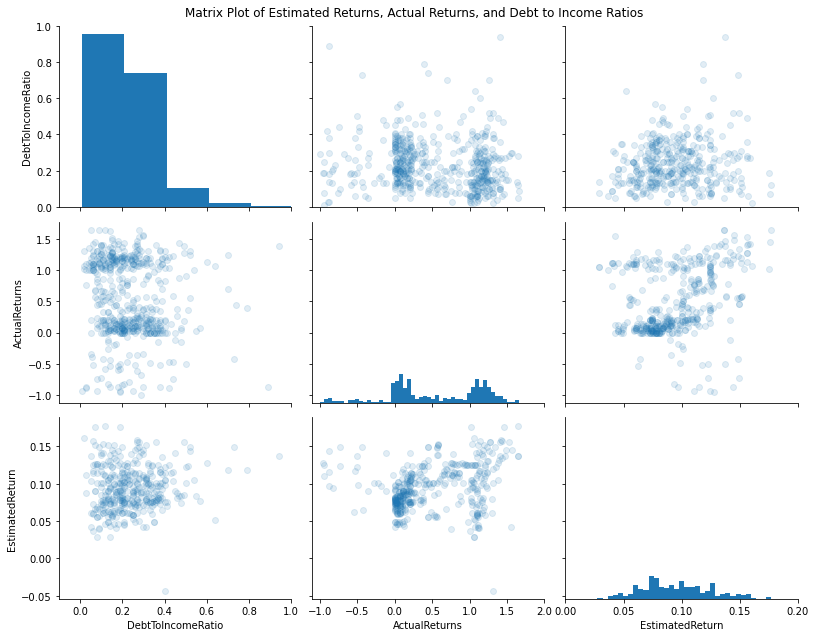

In [30]:
# plot the graph of features with 0.5% of data points
samples = np.random.choice(loan.shape[0], int(loan.shape[0]*.005), replace = False)
loan_samp = loan.loc[samples,:]

# pair grid
g = sb.PairGrid(data = loan_samp, vars = numeric_vars, size = 3, aspect = 1.25)
g = g.map_diag(plt.hist, bins = 50)
g.map_offdiag(plt.scatter, alpha = 1/8)

# set axis limits
g.axes[0,0].set_ylim(0,1)
g.axes[0,0].set_xlim(-.1,1)
g.axes[0,1].set_xlim(-1.1,2)
g.axes[0,2].set_xlim(0,.2)

g.fig.suptitle('Matrix Plot of Estimated Returns, Actual Returns, and Debt to Income Ratios')
g.fig.subplots_adjust(top = .95);

From the univariate exploration, we have a good undertanding regarding the range of values we can expect. By limiting the axis values, we are able to prevent outliers from skewing the plot. Otherwise, most of the points will appear to be grouped in a vertical line.

Surprisingly, there doesn't appear to be any correlation between the estimated returns and the actual returns we calculated. We may have to investigate further by querying select categories of loan status.

There doesn't appear to be a correlation between any of the other numeric variables either.

We can intuitively expect borrowers with a high debt to income ratio to be riskier and thus have a lower rate of return - but that doesn't seem to be the case.

Let's take a look at how a borrower's income range and credit rating relates to the investor's estimated returns.

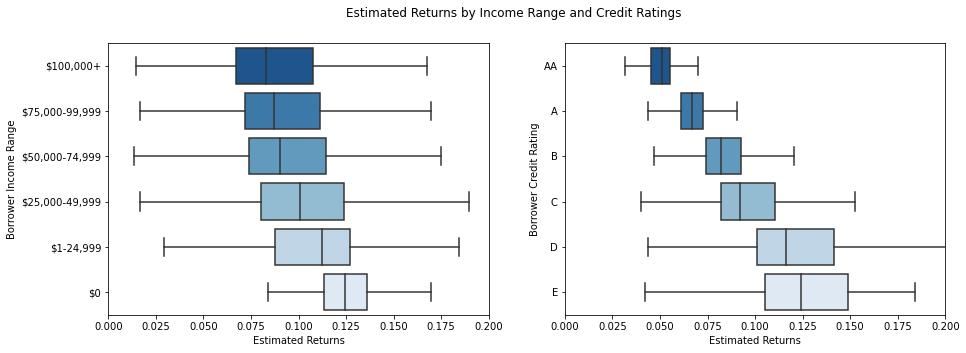

In [32]:
# boxplots
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = loan, y = 'IncomeRange', x = 'EstimatedReturn', palette = "Blues_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Income Range')
plt.xlabel('Estimated Returns')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = loan, y = 'ProsperRatingCombined', x = 'EstimatedReturn', palette = "Blues_r", showfliers = False)
plt.xlim(0,.2)
plt.ylabel('Borrower Credit Rating')
plt.xlabel('Estimated Returns')

plt.suptitle('Estimated Returns by Income Range and Credit Ratings');

From these boxplot, we're able to clearly see that as the borrowers income increases, the median estimated return decreases. The credit rating boxplot shows the trend more clearly, as a borrowers credit rating increases, the median estimated return greatly decreases.

We can speculate the reasoning that as income increases, the ability to repay the loan also increases, so to adjust for the higher risk, the interest rate for the loan also increases.

Also, creditors typically compete for these high income borrowers which drive the highest credit rating interest rates down.

It's interesting to see that the width and whiskers of the boxplots shrink as credit rating increases. This suggests that the expected returns for this feature is much more predictable vs the lower credit ratings.

Next let's plot the actual returns.

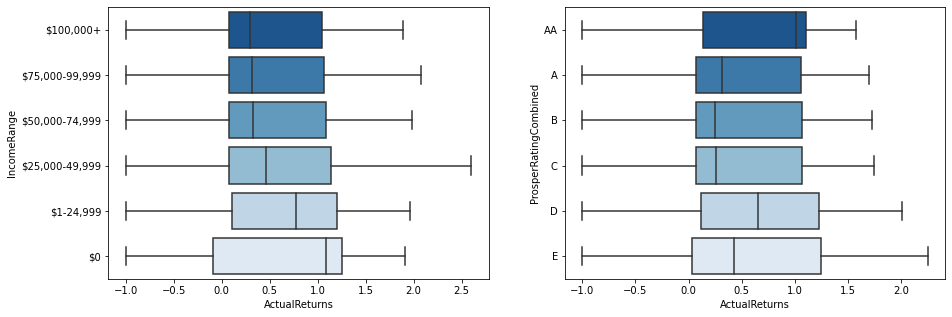

In [33]:
# boxplots
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = loan, y = 'IncomeRange', x = 'ActualReturns', palette = "Blues_r", showfliers = False)

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = loan, y = 'ProsperRatingCombined', x = 'ActualReturns', palette = "Blues_r", showfliers = False);

This plot is quite interesting as it suggests that investing in borrowers with no reported income and the highest credit ratings will produce the highest returns.

As mentioned previously, we may have to do a bit more digging to either group by loan status or attempt to refine our feature calculation.

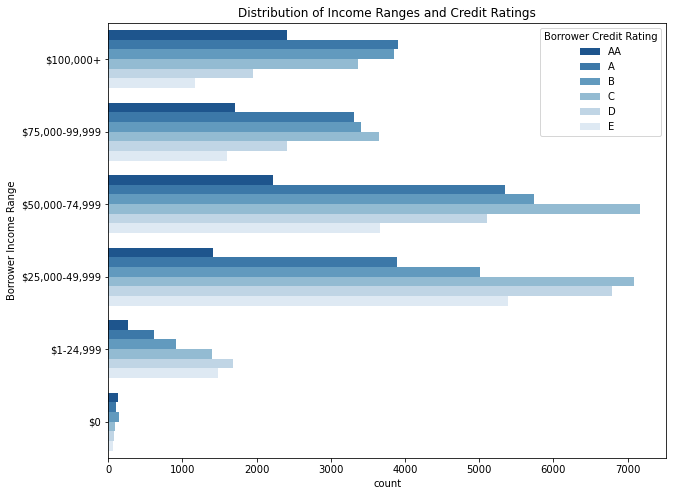

In [34]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = loan, y = 'IncomeRange', hue = 'ProsperRatingCombined',
                   palette = 'Blues_r')

ax.legend(title = 'Borrower Credit Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

From this clustered bar chart, we can see the trend of higher incomes correlate to a higher credit rating qualifying the borrower for the best (lowest) interest rates.

Having an income of `$75k+` doesn't automatically guarantee the best credit ratings. I'm curious to see in the multivariate analysis what other factors play a big role in determining one's credit rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the matrix plot, I noticed that our numerical features of interest did not have any correlation. Also, there was no correlation between debt to income ratios, estimated returns, and actual returns.

From our box plots, we saw a trend of median estimated returns decrease as the borrowers income range increased. This makes intuitive sense as borrowers with a higher income can demand the most competetive rates from creditors. The overlap in our boxplot suggests that borrowers in any income range (except `$0`) can produce the same estimated return for an investor. The trend between lower estimated returns and higher credit ratings was much more apparent with narrowing quartiles and lower medians.

The box plot for the actual returns revealed additional tweaking or grouping will be necessary to produce any insights.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From our clustered bar chart, we peeled back another layer to look at credit ratings and income ranges. This revealed that the previous trend of high income equating to better credit ratings, however there are some interesting cases where a high number of borrowers with no income qualified for the highest credit ratings. Also, we saw that borrowers with incomes of greater than `$75k` can still be considered "High Risk" borrowers.


## Multivariate Exploration

The main thing I want to explore in the multivariate exploration is the relationship between income ranges, credit scores, and estimated returns.

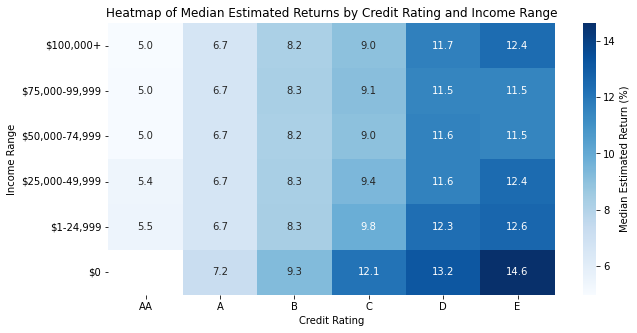

In [35]:
# create a heat map of average estimated returns
plt.figure(figsize = [10,5])

cat_med = loan.groupby(['ProsperRatingCombined', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRatingCombined', values = 'EstimatedReturnMedian')

sb.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Median Estimated Returns by Credit Rating and Income Range');

From the heat map we continue to see the trend of lower credit ratings, and lower incomes equate to higher returns. It's interesting to see that the income range does not play a big influence on the estimated returns by credit rating category.

Across the credit ratings 'AA', 'A', and 'B', we observe no difference in the rate of return for income ranges `$1-100k+`. However, there is a definite jump in returns for the \$0 income range across all credit rating categories.

Across the credit ratings 'C', 'D', and 'E', we notice a bit more variability however the median return is still within +- 1\% (except the `$0` category).

Since we know that credit ratings are a better indicator of estimated returns, let's see if the status of a loan will allow us to see a correlation between our estimated returns and actual returns.

In [44]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113806 entries, 0 to 113936
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113806 non-null  object  
 1   ListingNumber                        113806 non-null  int64   
 2   ListingCreationDate                  113806 non-null  object  
 3   CreditGrade                          113806 non-null  object  
 4   Term                                 113806 non-null  int64   
 5   LoanStatus                           113806 non-null  category
 6   ClosedDate                           54958 non-null   object  
 7   BorrowerAPR                          113781 non-null  float64 
 8   BorrowerRate                         113806 non-null  float64 
 9   LenderYield                          113806 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

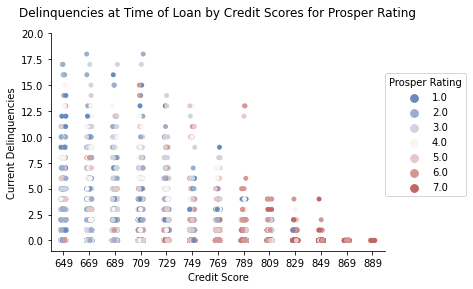

In [51]:
sb.stripplot(x='CreditScore', y='CurrentDelinquencies', hue='ProsperRating (numeric)', palette='vlag', data=loan)

plt.title('Delinquencies at Time of Loan by Credit Scores for Prosper Rating', y=1.05)
plt.ylim(-1,20)
plt.legend(loc=(1, 0.25), title='Prosper Rating')
plt.ylabel('Current Delinquencies')
plt.xlabel('Credit Score')
sb.despine(top=True);

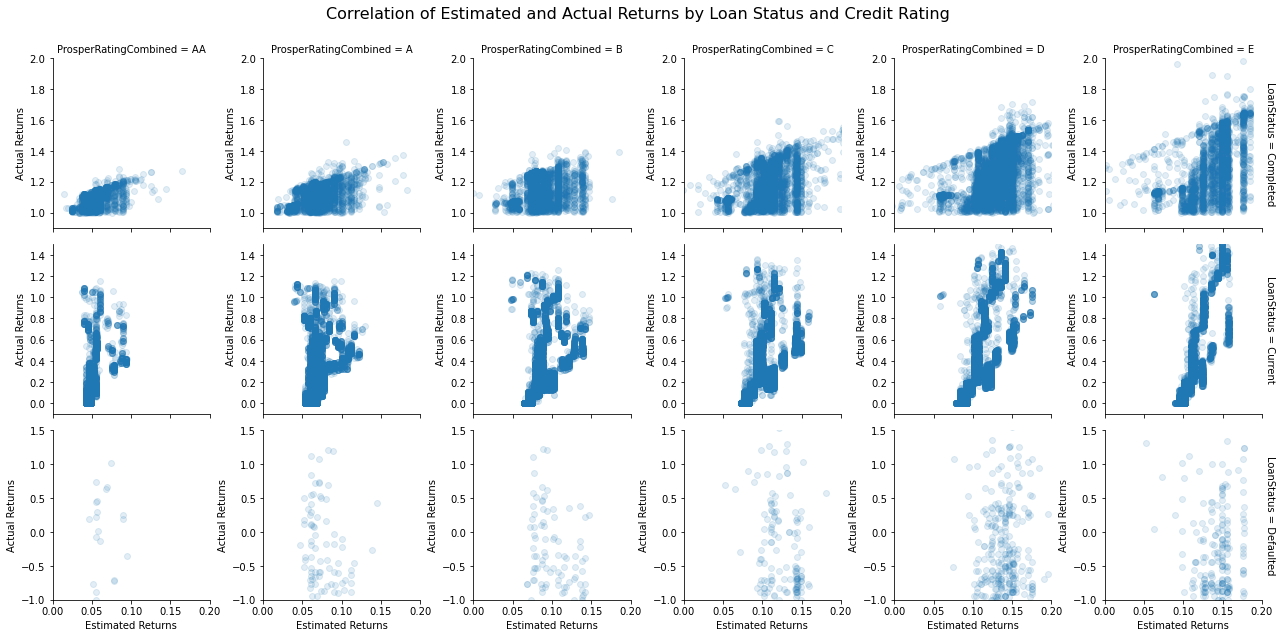

In [36]:
# create scatter plot across credit ratings and loan status
g = sb.FacetGrid(data = loan, col = 'ProsperRatingCombined', row_order = ['Completed', 'Current', 'Defaulted'], 
                  row = 'LoanStatus', margin_titles = True, xlim = (0,.2), sharey = False)
g.map(plt.scatter, 'EstimatedReturn', 'ActualReturns', alpha = 1/8)

# set different y axes for different loan statuses
for i, ax in enumerate(g.axes.flat):
    if i < 6:
        ax.set_ylim(.9, 2)
    elif i < 12:
        ax.set_ylim(-.1, 1.5)
    else:
        ax.set_ylim(-1, 1.5)
        
g.set(xlabel = 'Estimated Returns', ylabel = 'Actual Returns')

g.fig.suptitle('Correlation of Estimated and Actual Returns by Loan Status and Credit Rating', size = 16)
g.fig.subplots_adjust(top = .9);

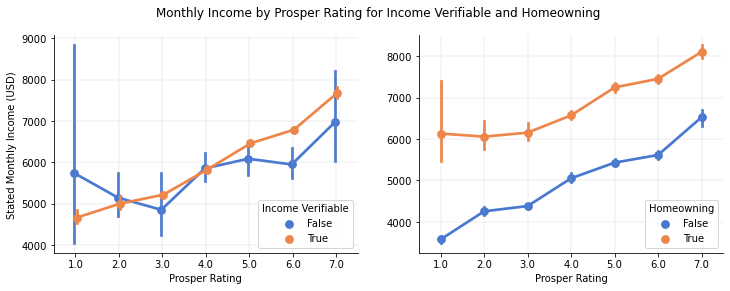

In [42]:
fig, axs = plt.subplots(ncols=2, figsize=(12,4))

fig.suptitle('Monthly Income by Prosper Rating for Income Verifiable and Homeowning')

sb.pointplot(data=loan, y='StatedMonthlyIncome', x='ProsperRating (numeric)', hue='IncomeVerifiable', palette='muted', dodge=True, ax=axs[0])
axs[0].grid(lw=0.2)
axs[0].set_ylabel('Stated Monthly Income (USD)')
axs[0].set_xlabel('Prosper Rating')
axs[0].legend(title='Income Verifiable')

sb.pointplot(x='ProsperRating (numeric)', y='StatedMonthlyIncome', hue='IsBorrowerHomeowner', palette='muted', data=loan, ax=axs[1])
axs[1].grid(lw=0.2)
axs[1].set_ylabel('')
axs[1].set_xlabel('Prosper Rating')
axs[1].legend(title='Homeowning')

sb.despine(top=1)

Hard to say if IncomeVerifiable affects ProsperRating. We can see that the estimator for a ProsperRating of HR points to approximately USD 6,000, while the same value can be found at ProsperRating equal to C.

By looking at the other plot, owning a home doesn't seem to affect ProsperRating. Borrowers that receive an AA ProsperRating and do not own a home have, on average, StatedMonthlyIncome of USD 6,000, whereas borrowers that do own a home and have the same StatedMontlyIncome receive a lower rating. This indicates that other things might be influencing these ratings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I simplified the plot a bit by only looking at three loan statuses: Completed, Current, and Defaulted.

For loans that are defaulted, there doesn't appear to be any correlation between the predicted estimated return and the actual return of the loan.

For loans that are current, there appears to be a linear relationship between the estimated and actual returns! Recall that during our bivariate exploration we were unable to see the trend as all of the loan status were lumped together.


### Were there any interesting or surprising interactions between features?

For loans that are completed, wee can se there is a clear linear relationship with estimated returns and actual returns. However, it also appears this linear line is shaded as well. This means that no matter what the estimated return for the loan was, there is a chance the loan always returns the full balance. This may occur if a borrower received the loan and quickly paid it off in a couple of months, minimizing the amount of interest paid.

## References

[1] Some ideas were taken from this article(https://rpubs.com/onpillow/446310) by Lorna Yen.